# Importing Libraries


In [30]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import animation
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [31]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [33]:
#first 5 rows of the dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [34]:
#last 5 rows
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


# Size of the Dataset

In [35]:
print("Number of rows in the Dataset : ", df.shape[0])
print("Number of columns in the Dataset : ", df.shape[1])

Number of rows in the Dataset :  181691
Number of columns in the Dataset :  135


# Data Structure and Content

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [39]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# All the Column names of the dataset

In [41]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

# Data Cleaning

In [43]:
#percentage of missing values
((df.isnull().sum().sum())/df.size)*100

56.481747500895395

**About 56%, hence more than half of data is missing.**

In [44]:
#selcting relevant columns

df = df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound', 'gname']]
df

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound,gname
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Firearms,1.0,2.0,Al-Shabaab
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Explosives,2.0,7.0,Muslim extremists
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,Incendiary,0.0,0.0,Bangsamoro Islamic Freedom Movement (BIFM)
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Explosives,0.0,0.0,Unknown


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181256 non-null  object 
 7   attacktype1_txt  181691 non-null  object 
 8   targtype1_txt    181691 non-null  object 
 9   weaptype1_txt    181691 non-null  object 
 10  nkill            171378 non-null  float64
 11  nwound           165380 non-null  float64
 12  gname            181691 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 18.0+ MB


# Renaming the Columns

In [46]:
cols = {'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country', 'region_txt': 'Region', 'provstate': 'State', 'city': 'City', 'attacktype1_txt': 'Attack_Type', 'targtype1_txt': 'Target', 'weaptype1_txt': 'Weapon_Type', 'nkill': 'Killed', 'nwound': 'Wounded', 'gname': 'Group_Name'}
df.rename(columns=cols, inplace=True)
df.head()

,Year,Month,Day,Country,Region,State,City,Attack_Type,Target,Weapon_Type,Killed,Wounded,Group_Name
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,Unknown


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   State        181270 non-null  object 
 6   City         181256 non-null  object 
 7   Attack_Type  181691 non-null  object 
 8   Target       181691 non-null  object 
 9   Weapon_Type  181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Group_Name   181691 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 18.0+ MB


# Handling Missing Values

In [48]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State            421
City             435
Attack_Type        0
Target             0
Weapon_Type        0
Killed         10313
Wounded        16311
Group_Name         0
dtype: int64

**Applying mode and mean of the columns to fill the NaN values**

In [49]:
# Fill NaN values with the mean of the column (for numeric data)
df['Wounded'] = df['Wounded'].fillna(df['Wounded'].mean()).astype(int)
df['Killed'] = df['Killed'].fillna(df['Killed'].mean()).astype(int)

# Fill NaN values with the mode of the column (for categorical data)
df['State'] = df['State'].fillna(df['State'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Target'] = df['Target'].fillna(df['Target'].mode()[0])

In [51]:
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
State          0
City           0
Attack_Type    0
Target         0
Weapon_Type    0
Killed         0
Wounded        0
Group_Name     0
dtype: int64

# EDA Analysis

# Univariate Analysis

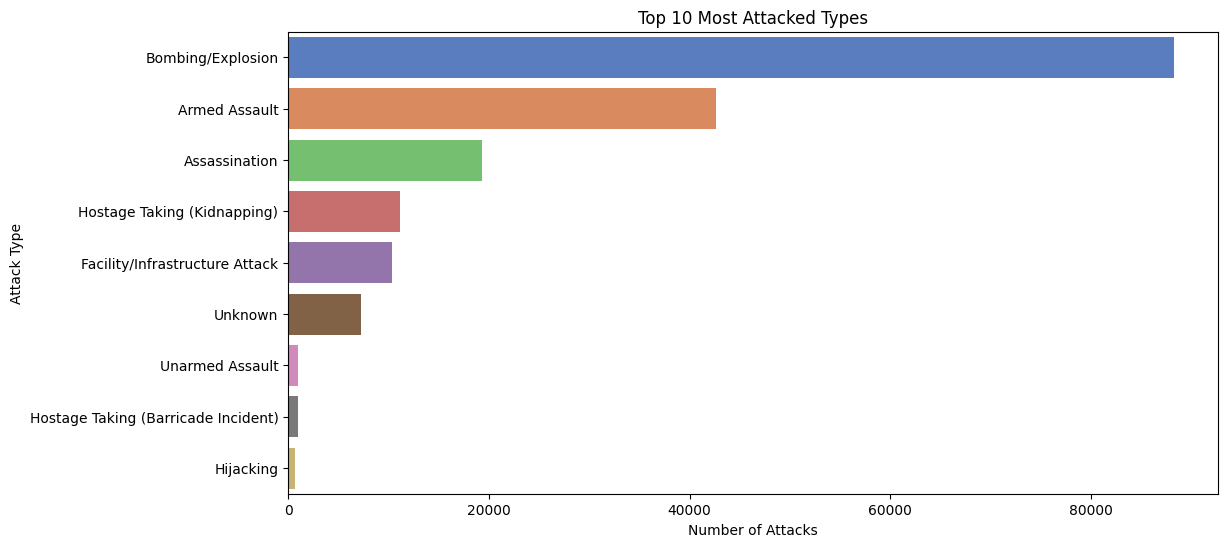

In [52]:
plt.figure(figsize=(12, 6))
attack_type_counts = df['Attack_Type'].value_counts().head(10)
sns.barplot(x=attack_type_counts.values, y=attack_type_counts.index, palette='muted')
plt.title('Top 10 Most Attacked Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()

**Analayzed:**

Most Attacks happened with Bombing/Explosion.

The next most Attacks happened with Armed Assault and Assassination.

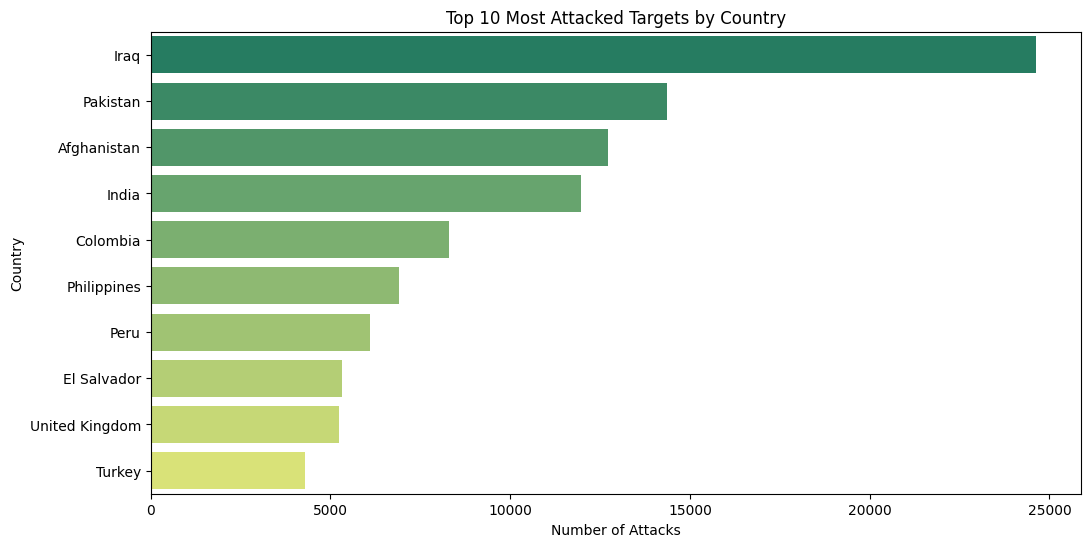

In [54]:
plt.figure(figsize=(12, 6))
target_country_counts = df[df['Target'].notna()]['Country'].value_counts().head(10)
sns.barplot(x=target_country_counts.values, y=target_country_counts.index, palette='summer')
plt.title('Top 10 Most Attacked Targets by Country')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()

**The most attacked country by Terrorism, and the next ones are Pakistan and Afghanistan.**

In [55]:
(df['Target'].value_counts().head(10)/df['Target'].shape[0])*100


Target
Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: count, dtype: float64

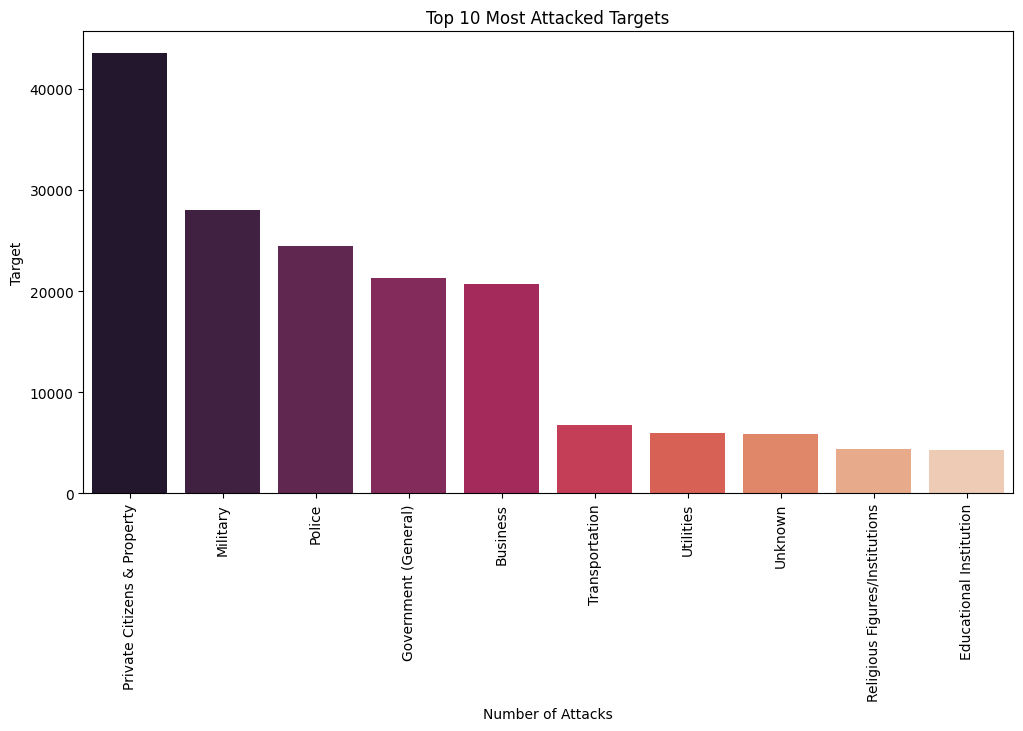

In [56]:
plt.figure(figsize=(12, 6))
target_counts = df['Target'].value_counts().head(10)
sns.barplot(x=target_counts.index, y=target_counts.values, palette='rocket')
plt.title('Top 10 Most Attacked Targets')
plt.xlabel('Number of Attacks')
plt.xticks(rotation=90)
plt.ylabel('Target')
plt.show()

**Analyzed:**

The most Attacked Target is 'Private Citizens & Property' which is approximately 25%.

The next Targets which is 'Military','Police', 'Government', 'Business' with 10-20%.

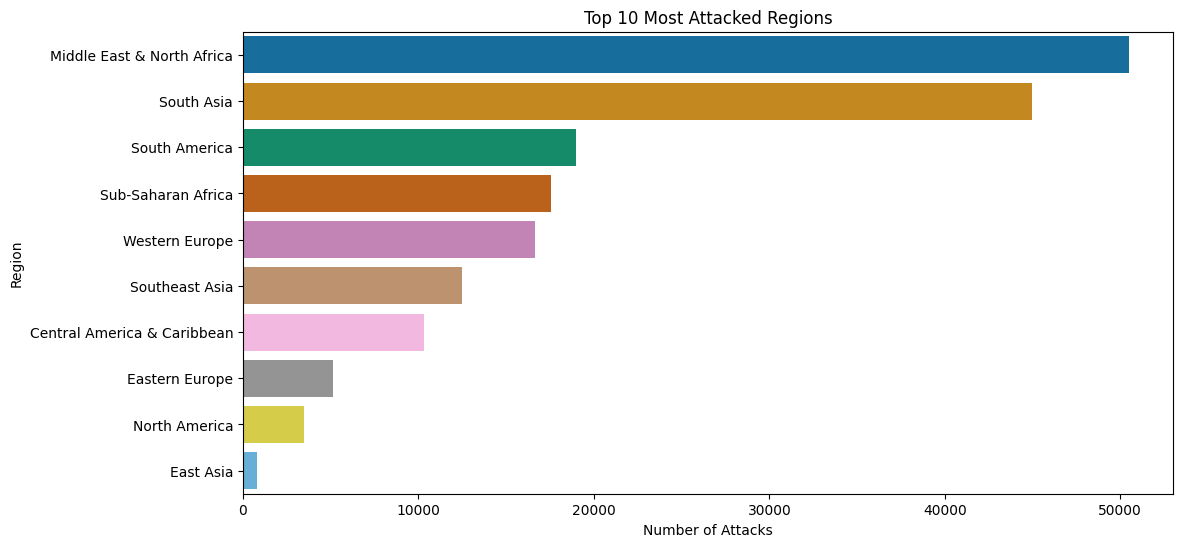

In [57]:
plt.figure(figsize=(12, 6))
region_counts = df['Region'].value_counts().head(10)
sns.barplot(x=region_counts.values, y=region_counts.index, palette='colorblind')
plt.title('Top 10 Most Attacked Regions')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()

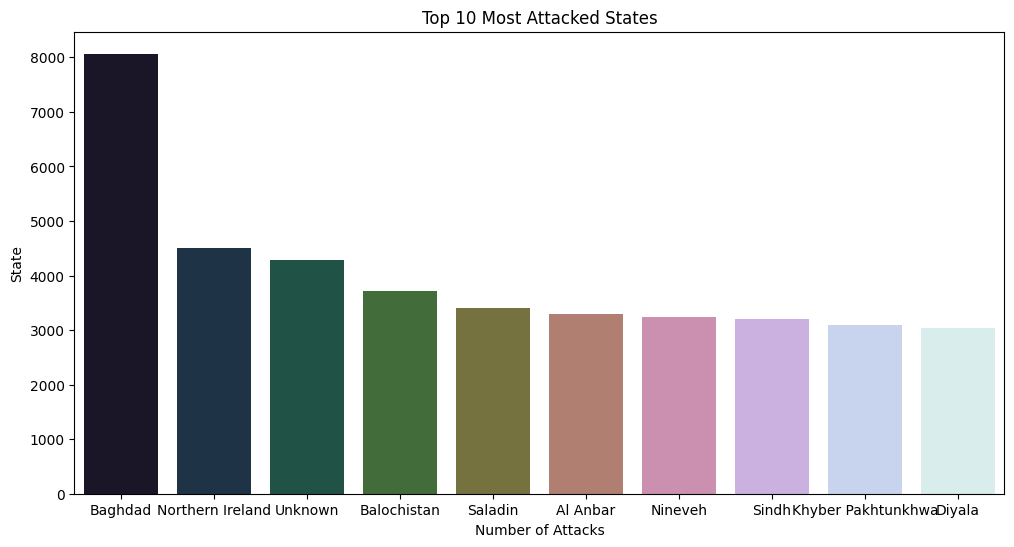

In [58]:
plt.figure(figsize=(12, 6))
state_counts = df['State'].value_counts().head(10)
sns.barplot(y=state_counts.values, x=state_counts.index, palette='cubehelix')
plt.title('Top 10 Most Attacked States')
plt.xlabel('Number of Attacks')
plt.ylabel('State')
plt.show()

**Analyzed:**

The most attacked region is Middle East and North Africa, then South Asia.

The Most attacked State is Baghdad.

In [59]:
(df['Weapon_Type'].value_counts().head()/df['Weapon_Type'].shape[0])*100

Weapon_Type
Explosives    50.869883
Firearms      32.210731
Unknown        8.342185
Incendiary     6.128537
Melee          2.011657
Name: count, dtype: float64

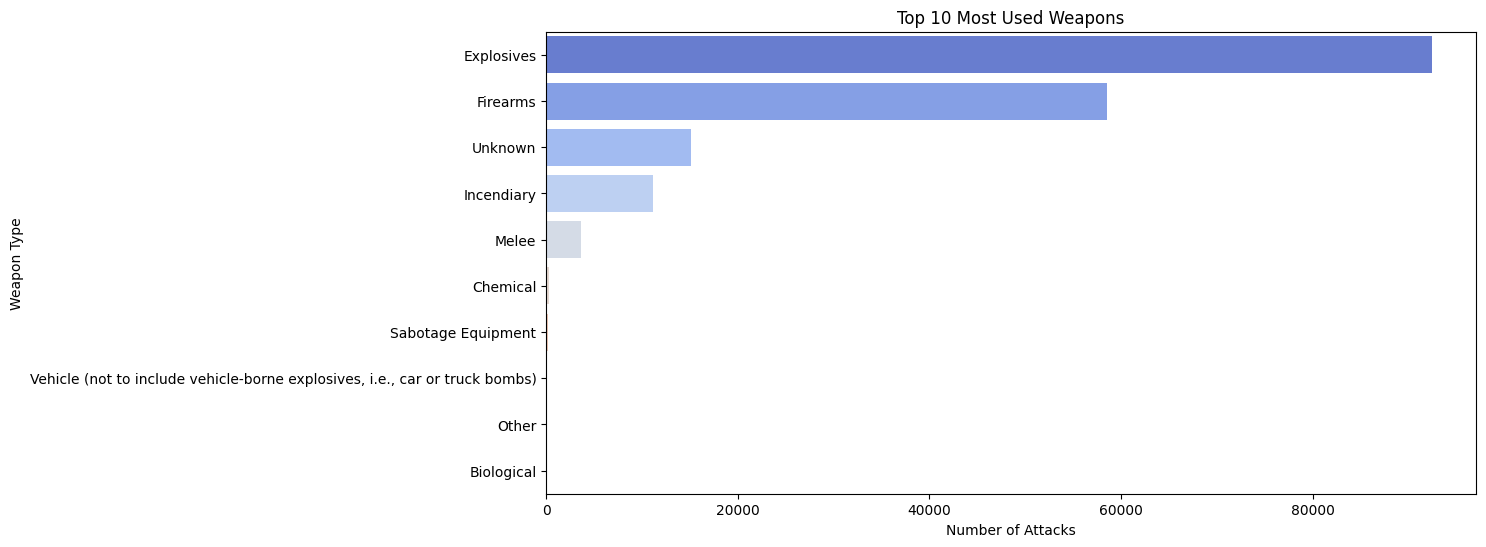

In [60]:
plt.figure(figsize=(12, 6))
weapon_counts = df['Weapon_Type'].value_counts().head(10)
sns.barplot(x=weapon_counts.values, y=weapon_counts.index, palette='coolwarm')
plt.title('Top 10 Most Used Weapons')
plt.xlabel('Number of Attacks')
plt.ylabel('Weapon Type')
plt.show()

**Nearly 51% of the weapons used is Explosives, and the next one is Firearms showed more than 32%.**

# Bivariate Analysis

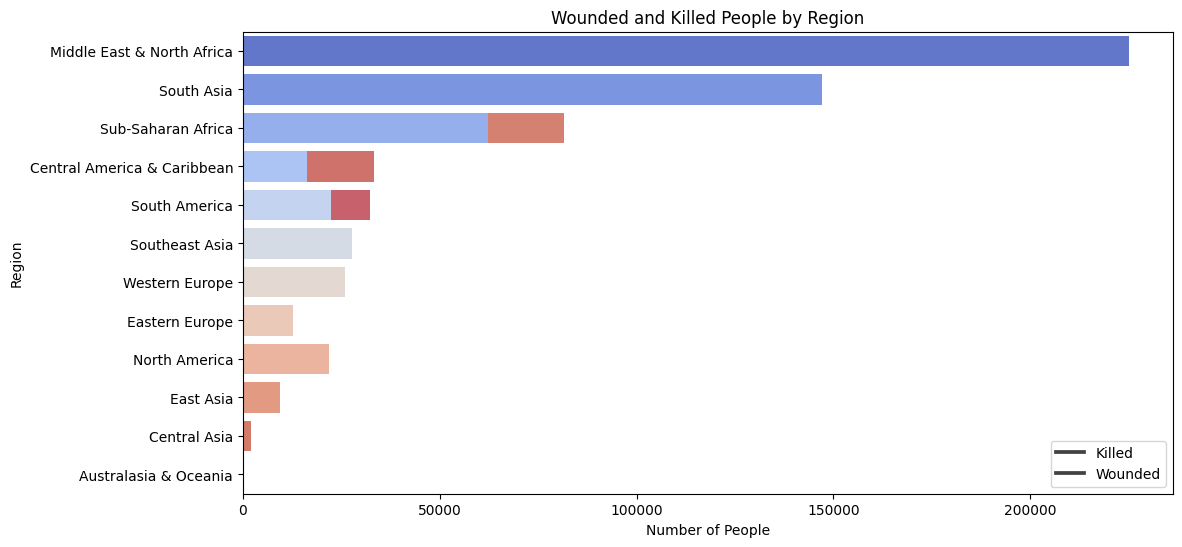

In [61]:
plt.figure(figsize=(12, 6))
wounded_killed_by_region = df.groupby('Region')[['Wounded', 'Killed']].sum().sort_values(by='Killed', ascending=False)
sns.barplot(data=wounded_killed_by_region, x='Killed', y=wounded_killed_by_region.index, palette='flare')
sns.barplot(data=wounded_killed_by_region, x='Wounded', y=wounded_killed_by_region.index, palette='coolwarm')
plt.title('Wounded and Killed People by Region')
plt.xlabel('Number of People')
plt.ylabel('Region')
plt.legend(['Killed', 'Wounded'])
plt.show()

**Analyzed:**

The region of Middle East & North Africa has experienced the highest number of casualties due to terrorism, with more than 140,000 people killed and over 200,000 people wounded. The region has faced significant challenges and devastating consequences as a result of terrorist activities.

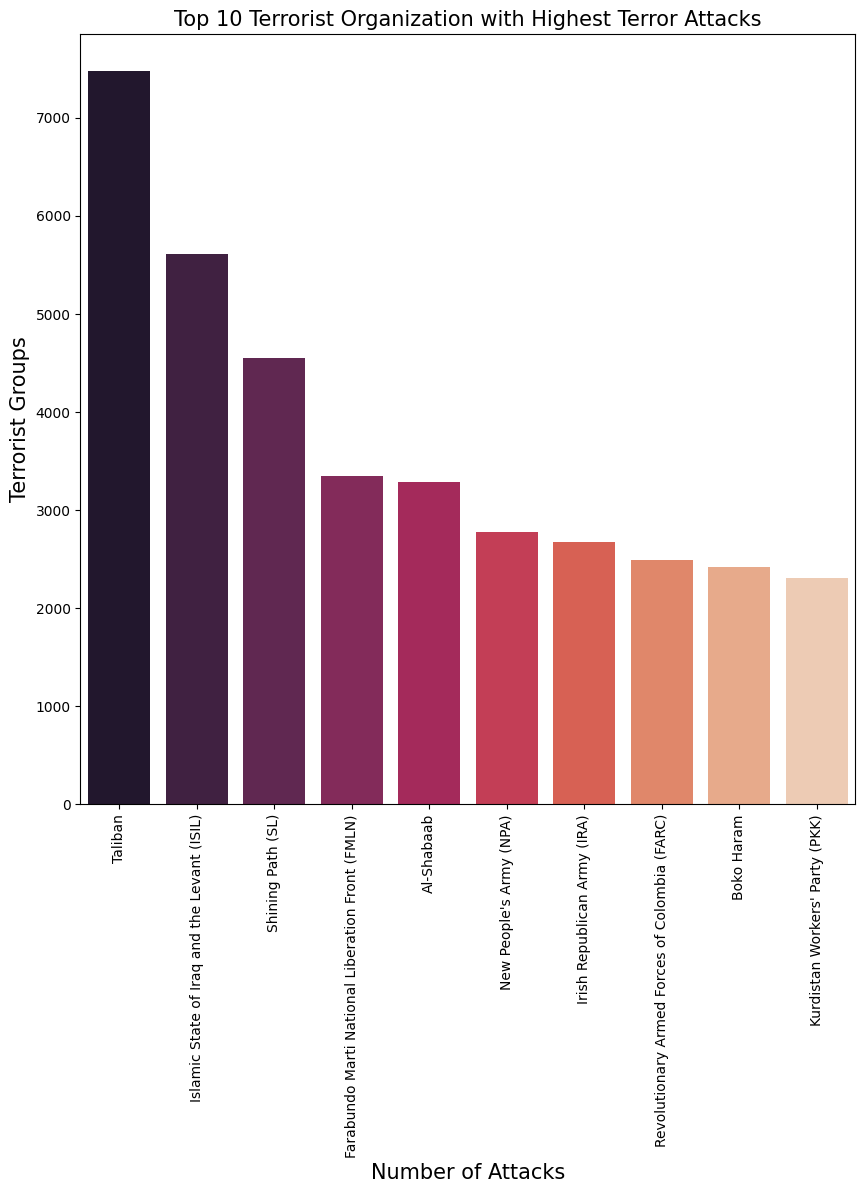

In [63]:
# Top 10 Terrorist Organizations with Highest Terror Attacks
plt.figure(figsize=(10,10))
sns.barplot(y = df['Group_Name'].value_counts()[1:11].values, x = df['Group_Name'].value_counts()[1:11].index,palette='rocket')
plt.title('Top 10 Terrorist Organization with Highest Terror Attacks',fontsize=15)
plt.xlabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Terrorist Groups',fontsize=15)
plt.show()

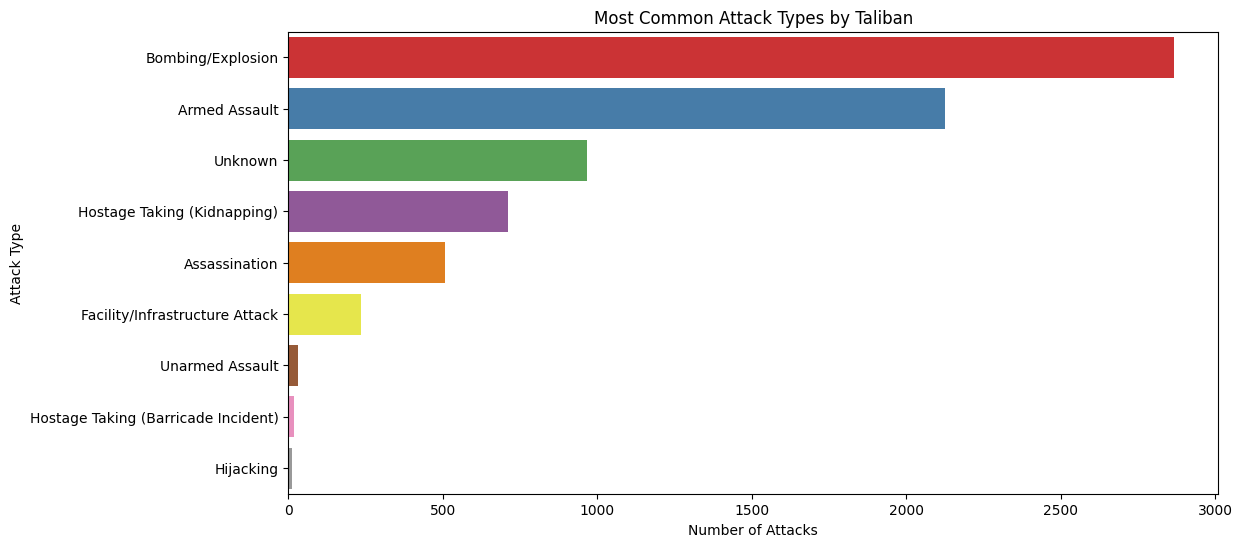

In [64]:
number_one_group = df['Group_Name'].value_counts().index[1]
group_df = df[df['Group_Name'] == 'Taliban']

# Perform analysis and visualization specific to the number one group: Taliban

# Visualize the most common attack types by Taliban
plt.figure(figsize=(12, 6))
group_attack_types = group_df['Attack_Type'].value_counts().head(10)
sns.barplot(x=group_attack_types.values, y=group_attack_types.index, palette='Set1')
plt.title(f"Most Common Attack Types by {number_one_group}")
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()

# Observation

Following are some conclusions that may be drawn from the dataset based on the exploratory data analysis:

-Military, police, and governmental agencies are the most frequently attacked, followed by private citizens and property.

-The most casualties have occurred in the Middle East and North Africa area, where more than 140,000 people have been killed and more than 200,000 have been injured.

-Iraq has suffered a sizable number of casualties as a result of terrorist strikes.

The most impacted state and city is Baghdad, thus more security measures are required there.

-The most common attack type is Bombing/Explosion.

-Explosives are consistently the most popular weapon of choice for terrorists.

-The Taliban is responsible for the majority of terror attacks, particularly since 2012.

# Conclusion

-Middle East and North Africa are hot spots for terrorism, hence attention should be paid to these areas.

-The governments of Iraq, Afghanistan, and Pakistan should be conscious of the suffering of their populations.

-Security needs to be tightened in all of these places since terrorists prefer to target ordinary people, the military, and the police.

-Terrorists most frequently utilise explosives and bombs as weapons. Government should enforce stricter gun laws and tighter border controls.